# Übung 1 - Visualisierung von Biosignalen
***

**Name:** Tayyeb Hussain, Mert Sevindik
<br>
**Matr.-Nr.:** s0554962, s0553418

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Mo, 15.04.2019
<br>
**Abgabe:** So, 05.05.2019, 23:59 Uhr

---

## Aufgabenbeschreibung

### Die *Elektroenzephalografie (EEG)* ist eine wichtige Methode zur medizinischen Diagnostik. Mittels EEG lässt sich die summierte elektrische Aktivität des Gehirns messen. Auf Basis der Messung und einer geeigneten Visualisierung der Messdaten können wichtige Erkenntnisse zur Diagnose und Therapie aber auch zu Forschungszwecken gewonnen werden.

In der Regel wird das gemessene EEG-Signal vor einer Visualisierung in mehrere Frequenzbänder (Wellenlängenbereiche) eingeteilt und jeweils durch einen eigenen Graphen visualisiert. Historisch sind dies:
- Delta-Wellen (0,1 bis <4 Hz)
- Theta-Wellen (4 bis <8 Hz)
- Alpha-Wellen (8 bis <13 Hz)
- Beta-Wellen (13 bis <30 Hz)

Ziel dieser Übung ist die Einteilung und Visualisierung der vier oben genannten Frequenzbänder für ungefilterte EEG-Messdaten mit Hilfe von Tief- und Bandpassfilter.


**Generelle Hinweise zur Bearbeitung:** 

Für die Visualisierung soll das *matplotlib*-Paket verwendet werden. Alle Diagramme sollen *inline* in diesem Notebook ausgegeben werden. Alle interaktiven Inhalte sollen unter Venwendung der Funktionen des Pakets *ipywidgets* realisiert werden.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 1 - Biosignale_s0500000.ipynb`).
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Datei `eeg_data.txt` muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 25% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

***
***

### Aufgaben:

**1. Datenimport**

Importieren Sie die EEG-Messdaten aus der gegebenen Textdatei.

Inhalt der Textdatei ist eine EEG-Zeitserie mit ungefilterten Messdaten.

Die bereitgestellte Datei mit den ungefilterten EEG-Messdaten ist folgender Quelle entnommen:
<http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3> (Set A - Z.zip -- Datei Z001.txt)

Wichtige Hinweise zum Datensatz:
- Samplingrate der Messdaten: 173.61 Hz
- Frequenzmessbereich: 0.5 bis 85 Hz
- 4097 Messpunkte (bei der Quelle sind 4096 Messpunkte angegeben, tätsächlich sind es jedoch 4097)

**Hinweis:** Beachten Sie, welches Datenformat die nachfolgenden Schritte voraussetzen!

Visualisieren Sie die eingelesenen Messdaten in einem Liniendiagramm:

- x-Achse: Zeit in Sekunden
- y-Achse: Signal in $\mu V$

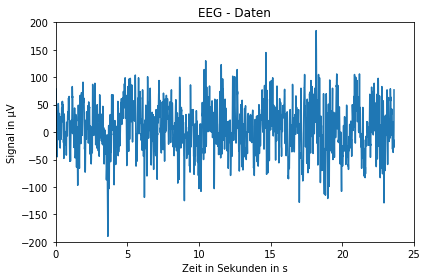

In [17]:
# Textdatei öffnen und alle lines auslesen

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('eeg_data.txt')

fs = 173.61
xAchse = (1/fs) * data.size
xLin = np.linspace(0,xAchse,data.size)

plt.ylabel('Signal in µV')
plt.xlabel('Zeit in Sekunden in s')
plt.title('EEG - Daten')

plt.plot(xLin,data)
plt.tight_layout()
plt.axis([0, 25, -200,200 ])
plt.show()

**2. Vorverarbeitung**

Filtern Sie die importierten Messdaten mittels Tiefpassfilter zur Reduktion von hochfrequentem Rauschen.

Verwenden Sie zur Realisierung des Tiefpassfilters den *Butterworth*-Filter 2.Ordnung aus dem *SciPy*-Paket:
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html>

Ein lauffähiges Beispiel für einen Butterworth-Tiefpassfilters zur Orientierung finden Sie hier:
<http://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units#25192640> (**Anmerkung:** Die explizite Berechnung und Visualisierung der Frequency Response ist für diese Aufgabe nicht erforderlich)

Die Frequenzgrenze des Tiefpassfilters soll 40 Hz betragen. 

Visualisieren Sie die gefilterten Messdaten in einem separaten Diagramm analog zu **1.**

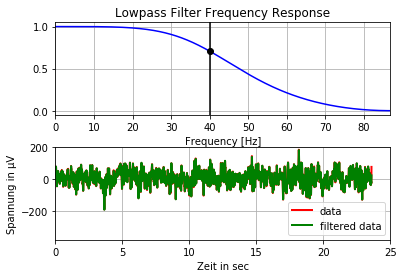

In [21]:
from scipy.signal import butter, lfilter,freqz

cutoff =40.0 #frequezgrenze
order=2 #2.Ordnung

#implementierung des Tiefpass-filters
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * sampling_rate #nyquistrate
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a #filterkoeffizienten, mit denen gefiltert werden soll

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order = order)
    y = lfilter(b, a, data)
    return y

#filterung der daten: tiefpassfilter aufrufen

filtered = butter_lowpass_filter(data,cutoff,fs,order)


# Prüfen ob in Frequenzbereich ist
nyq = 0.5 * fs 
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)

w, h = freqz(b, a, worN=None)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()




#visualisieren

plt.subplot(2,1,2)
plt.plot(xLin,data,'r-',linewidth=2, label = 'data')
plt.plot(xLin,filtered,'g-', linewidth=2,label = 'filtered data')
plt.axis([0, 25, -380,200])
plt.xlabel('Zeit in sec')
plt.ylabel('Spannung in µV')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace = 0.35)
plt.show()

**3. Anwendung von Bandpassfiltern auf die vorgefilterten Daten**

Teilen Sie die gefilterten Daten aus **2.** durch Verwendung von Bandpassfiltern in die o.g. vier Frequenzbänder
- Delta-Wellen
- Theta-Wellen
- Alpha-Wellen
- Beta-Wellen

ein.

Zur Realisierung der Bandpassfilter sollen ebenfalls *Butterworth*-Filter 2.Ordnung verwendet werden (Link zur Dokumentation siehe bei **2.**)

Visualisieren Sie jeden Frequenzbereich in einem separaten Diagramm. Ordnen Sie die Diagramme untereinander an (siehe hierzu <http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot>).

**Hinweis:** Beachten Sie bei den Frequenzgrenzen die Angaben zum Frequenzmessbereich.

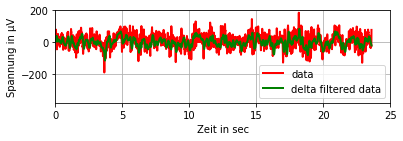

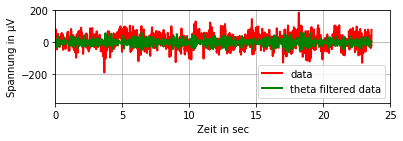

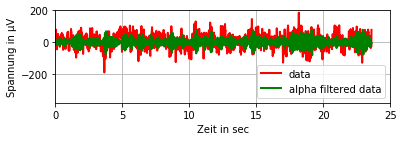

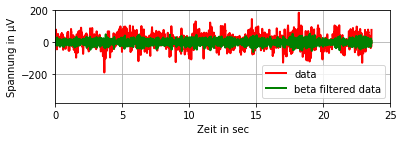

In [25]:
lowcutDelta = 0.1
highcutDelta = 4

lowcutTheta = 4
highcutTheta = 8

lowcutAlpha = 8
highcutAlpha = 13

lowcutBeta = 13
highcutBeta = 30

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


delta = butter_bandpass_filter(data, lowcutDelta, highcutDelta, fs, order=2)
theta = butter_bandpass_filter(data, lowcutTheta, highcutTheta, fs, order=2)
alpha = butter_bandpass_filter(data, lowcutAlpha, highcutAlpha, fs, order=2)
beta = butter_bandpass_filter(data, lowcutBeta, highcutBeta, fs, order=2)


bandpassNames = {"delta":delta, "theta": theta,"alpha":alpha,"beta":beta}
key = list(bandpassNames.keys())

def run(bandpass,i):
    
    plt.subplot(2,1,2)
    plt.plot(xLin,data,'r-',linewidth=2, label = 'data')
    plt.plot(xLin,bandpass,'g-', linewidth=2,label = '{} filtered data'.format(i))
    plt.axis([0, 25, -380,200])
    plt.xlabel('Zeit in sec')
    plt.ylabel('Spannung in µV')
    plt.grid()
    plt.legend()

    plt.subplots_adjust(hspace = 0.35)
    plt.show()
    
for i in key:
    run(bandpassNames[i],i)


**4. Visualisierung aller Datensätze**

Visualisieren sie alle sechs Datensätze aus **1.** - **3.** in einem einzelnen Diagramm. Jeder Datensatz soll über eine separate Farbe visualisiert werden. Sehen Sie für das Diagramm eine Legende vor, welche die Zuordnung der Farben erläutert. Formatieren Sie Ihre Darstellung (z.B. Platzierung der Legende, Wertebereich der y-Achse), so dass keine Daten von der Legende überlagert werden.

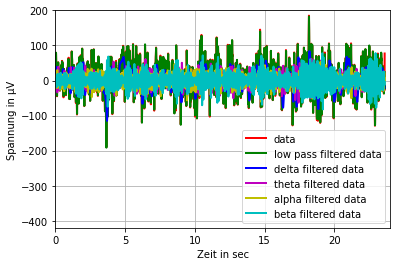

In [34]:
def run(bandpass1,bandpass2,bandpass3,bandpass4,a,b,c,d): 
    plt.plot(xLin,data,'r-',linewidth=2, label = 'data') #Aufgabe 1
    plt.plot(xLin,filtered,'g-', linewidth=2,label = 'low pass filtered data') #Aufgabe2
    plt.plot(xLin,bandpass1,'b-', linewidth=2,label = '{} filtered data'.format(a))#Aufgabe 3 Delta
    plt.plot(xLin,bandpass2,'m-', linewidth=2,label = '{} filtered data'.format(b))#theta
    plt.plot(xLin,bandpass3,'y-', linewidth=2,label = '{} filtered data'.format(c))#alpha
    plt.plot(xLin,bandpass4,'c-', linewidth=2,label = '{} filtered data'.format(d))#beta
    plt.axis([0, 24, -420,200])
    plt.xlabel('Zeit in sec')
    plt.ylabel('Spannung in µV')
    plt.grid()
    plt.legend()

    plt.show()   

run(delta,theta,beta,alpha,key[0],key[1],key[2],key[3])

**5. Interaktive Visualisierung mit Auswahl der Frequenzgrenzen und der Filterordnung**

Realisieren Sie eine interaktive Visualisierung zur Festlegung von

- Frequenzgrenzen (jeweils einen separaten Slider für untere und obere Grenze; Frequenzbereich: 0,5 - 30,0 Hz) und
- Filterordnung (2. bis 10. Ordnung als Slider)

für den Bandpassfilter (Eingangsdaten sind die vorgefilterten Daten aus **2.**).

Realisieren Sie ebenfalls eine einfache Fehlerbehandlung (z.B. falls untere Grenze > obere Grenze).

Stellen Sie das Ergebnis des Bandpassfilters in einem Diagramm zusammen mit der Datenreihe aus **2.** dar (inkl. Legende).

**Hinweis:** Bei kleinen Frequenzen und hoher Filterordnung kommt es zu extremen Werten nach der Filterung, die in der  Visualisierung den gesamten Plot beeinflussen. Dies ist *normal* und liegt an der Funktionsweise des Filters. Ihre Lösung sollte für die bereits in **3.** verwendeten Parameter jedoch korrekte Plots erzeugen. 